<a href="https://colab.research.google.com/github/jana-mahfouz/Bachelor2/blob/main/Bachelor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing csv files

In [1]:
from google.colab import files
uploaded = files.upload()


Saving NodesIndex.csv to NodesIndex (1).csv
Saving Nodes.csv to Nodes (1).csv
Saving Nodes Type (Plant & Storage).csv to Nodes Type (Plant & Storage) (1).csv
Saving Node Types (Product Group and Subgroup).csv to Node Types (Product Group and Subgroup) (1).csv
Saving Edges (Storage Location).csv to Edges (Storage Location) (1).csv
Saving Edges (Product Sub-Group).csv to Edges (Product Sub-Group) (1).csv
Saving Edges (Product Group).csv to Edges (Product Group) (1).csv
Saving Edges (Plant).csv to Edges (Plant) (1).csv


In [4]:
import pandas as pd

#Load CSV Files
nodes_df = pd.read_csv("Nodes.csv")
nodes_index_df = pd.read_csv("NodesIndex.csv")
nodes_type_plant_storage_df = pd.read_csv("Nodes Type (Plant & Storage).csv")
nodes_type_product_group_df = pd.read_csv("Node Types (Product Group and Subgroup).csv")
edges_storage_location_df = pd.read_csv("Edges (Storage Location).csv")
edges_product_subgroup_df = pd.read_csv("Edges (Product Sub-Group).csv")
edges_product_group_df = pd.read_csv("Edges (Product Group).csv")
edges_plant_df = pd.read_csv("Edges (Plant).csv")


print(nodes_df.head())
print(nodes_index_df.head())
print(nodes_type_plant_storage_df.head())
print(nodes_type_product_group_df.head())
print(edges_storage_location_df.head())
print(edges_product_subgroup_df.head())
print(edges_product_group_df.head())
print(edges_plant_df.head())


         Node
0  SOS008L02P
1  SOS005L04P
2  SOS003L04P
3  SOS002L09P
4  SOS001L12P
         Node  NodeIndex
0  SOS008L02P          0
1  SOS005L04P          1
2  SOS003L04P          2
3  SOS002L09P          3
4  SOS001L12P          4
         Node  Plant  Storage Location
0  POV002L09P   2120            2030.0
1  SOS001L12P   2120            2030.0
2  POP002L09P   2120            2030.0
3  POP001L12P   2120            2030.0
4  POP001L12P   2120            2030.0
         Node Group Sub-Group
0  SOS008L02P     S       SOS
1  SOS005L04P     S       SOS
2  SOS003L04P     S       SOS
3  SOS002L09P     S       SOS
4  SOS001L12P     S       SOS
   Storage Location         node1       node2
0             130.0  ATWWP001K24P   ATN01K24P
1             330.0    SOS005L04P  SOS002L09P
2             330.0    SOS005L04P  SOS003L04P
3             330.0    SOS005L04P  SOS500M24P
4             330.0    SOS005L04P  SOS001L12P
        node1       node2 SubGroupCode
0  SOS008L02P  SOS005L04P          SO

Merging the csv files

In [5]:

#Merge Nodes with Index
nodes_merged = nodes_df.merge(nodes_index_df, on="Node", how="left")

#Merge with Product Group and Sub-Group Data
nodes_merged = nodes_merged.merge(nodes_type_product_group_df, on="Node", how="left")

#Merge with Plant & Storage Information
nodes_merged = nodes_merged.merge(nodes_type_plant_storage_df, on="Node", how="left")

#Merge with Edges Data (Relationships)
edges_merged = edges_storage_location_df.merge(edges_product_subgroup_df, on=["node1", "node2"], how="outer")
edges_merged = edges_merged.merge(edges_product_group_df, on=["node1", "node2"], how="outer")
edges_merged = edges_merged.merge(edges_plant_df, on=["node1", "node2"], how="outer")

#Merge Nodes with Edges
df = edges_merged.merge(nodes_merged, left_on="node1", right_on="Node", how="left")

#Save the Merged Dataset
df.to_csv("merged_supplygraph.csv", index=False)


#Display Results
print("Final Merged Dataset:")
print(df.head())

Final Merged Dataset:
   Storage Location_x   node1      node2 SubGroupCode GroupCode  Plant_x  \
0               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
1               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
2               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
3               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
4               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   

     Node  NodeIndex Group Sub-Group  Plant_y  Storage Location_y  
0  AT5X5K         22     A        AT     1921              2130.0  
1  AT5X5K         22     A        AT     1921              2130.0  
2  AT5X5K         22     A        AT     1921              2130.0  
3  AT5X5K         22     A        AT     1921              2130.0  
4  AT5X5K         22     A        AT     1916              1630.0  


Data Inspection:

In [6]:
df.head()

,Storage Location_x,node1,node2,SubGroupCode,GroupCode,Plant_x,Node,NodeIndex,Group,Sub-Group,Plant_y,Storage Location_y
0,330.0,AT5X5K,ATN01K24P,NaN,A,1903.0,AT5X5K,22,A,AT,1921,2130.0
1,330.0,AT5X5K,ATN01K24P,NaN,A,1903.0,AT5X5K,22,A,AT,1921,2130.0
2,330.0,AT5X5K,ATN01K24P,NaN,A,1903.0,AT5X5K,22,A,AT,1921,2130.0
3,330.0,AT5X5K,ATN01K24P,NaN,A,1903.0,AT5X5K,22,A,AT,1921,2130.0
4,330.0,AT5X5K,ATN01K24P,NaN,A,1903.0,AT5X5K,22,A,AT,1916,1630.0


In [7]:
df.info()
print(df.head())
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6857719 entries, 0 to 6857718
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Storage Location_x  float64
 1   node1               object 
 2   node2               object 
 3   SubGroupCode        object 
 4   GroupCode           object 
 5   Plant_x             float64
 6   Node                object 
 7   NodeIndex           int64  
 8   Group               object 
 9   Sub-Group           object 
 10  Plant_y             int64  
 11  Storage Location_y  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 627.8+ MB
   Storage Location_x   node1      node2 SubGroupCode GroupCode  Plant_x  \
0               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
1               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
2               330.0  AT5X5K  ATN01K24P          NaN         A   1903.0   
3               330.0  AT5X5K  ATN01K24P          NaN    

In [9]:
#Count null values in each column
null_counts = df.isnull().sum()

print("Null Values per Column:")
print(null_counts)


Null Values per Column:
Storage Location_x        306
node1                       0
node2                       0
SubGroupCode          5502751
GroupCode             5107300
Plant_x                554073
Node                        0
NodeIndex                   0
Group                       0
Sub-Group                   0
Plant_y                     0
Storage Location_y         58
dtype: int64


Data Cleaning

In [11]:
#Drop columns with too many missing values
df = df.drop(columns=['SubGroupCode', 'GroupCode'], errors='ignore')

#Fill missing values using mode
df = df.assign(
    **{
        'Storage Location_x': df['Storage Location_x'].fillna(df['Storage Location_x'].mode()[0]),
        'Plant_x': df['Plant_x'].fillna(df['Plant_x'].mode()[0]),
        'Storage Location_y': df['Storage Location_y'].fillna(df['Storage Location_y'].mode()[0])
    }
)

#Verify that missing values are handled
print(df.isnull().sum())


Storage Location_x    0
node1                 0
node2                 0
Plant_x               0
Node                  0
NodeIndex             0
Group                 0
Sub-Group             0
Plant_y               0
Storage Location_y    0
dtype: int64


In [12]:
#Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

#Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows: 6730049


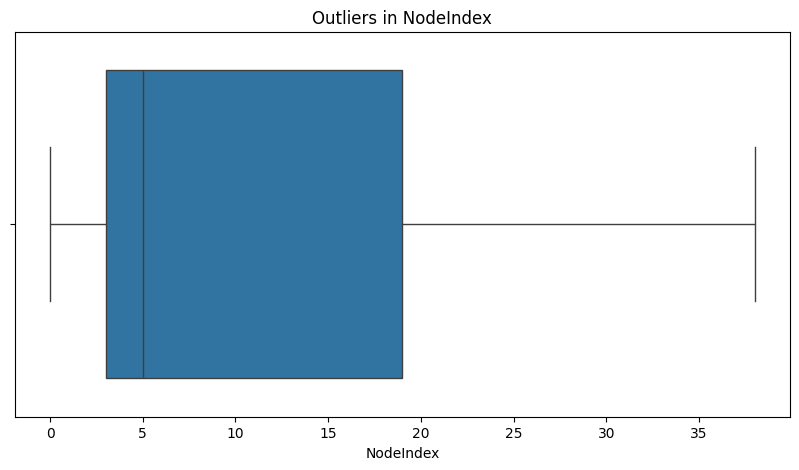

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['NodeIndex'])
plt.title("Outliers in NodeIndex")
plt.show()


In [14]:
#Remove rows where NodeIndex is above the 99th percentile
df = df[df['NodeIndex'] < df['NodeIndex'].quantile(0.99)]


In [16]:
print(df.isnull().sum())


Storage Location_x    0
node1                 0
node2                 0
Plant_x               0
Node                  0
NodeIndex             0
Group                 0
Sub-Group             0
Plant_y               0
Storage Location_y    0
dtype: int64


In [17]:
#save the cleaned dataframe
df.to_csv("cleaned_supplygraph.csv", index=False)


Visualization

<Axes: >

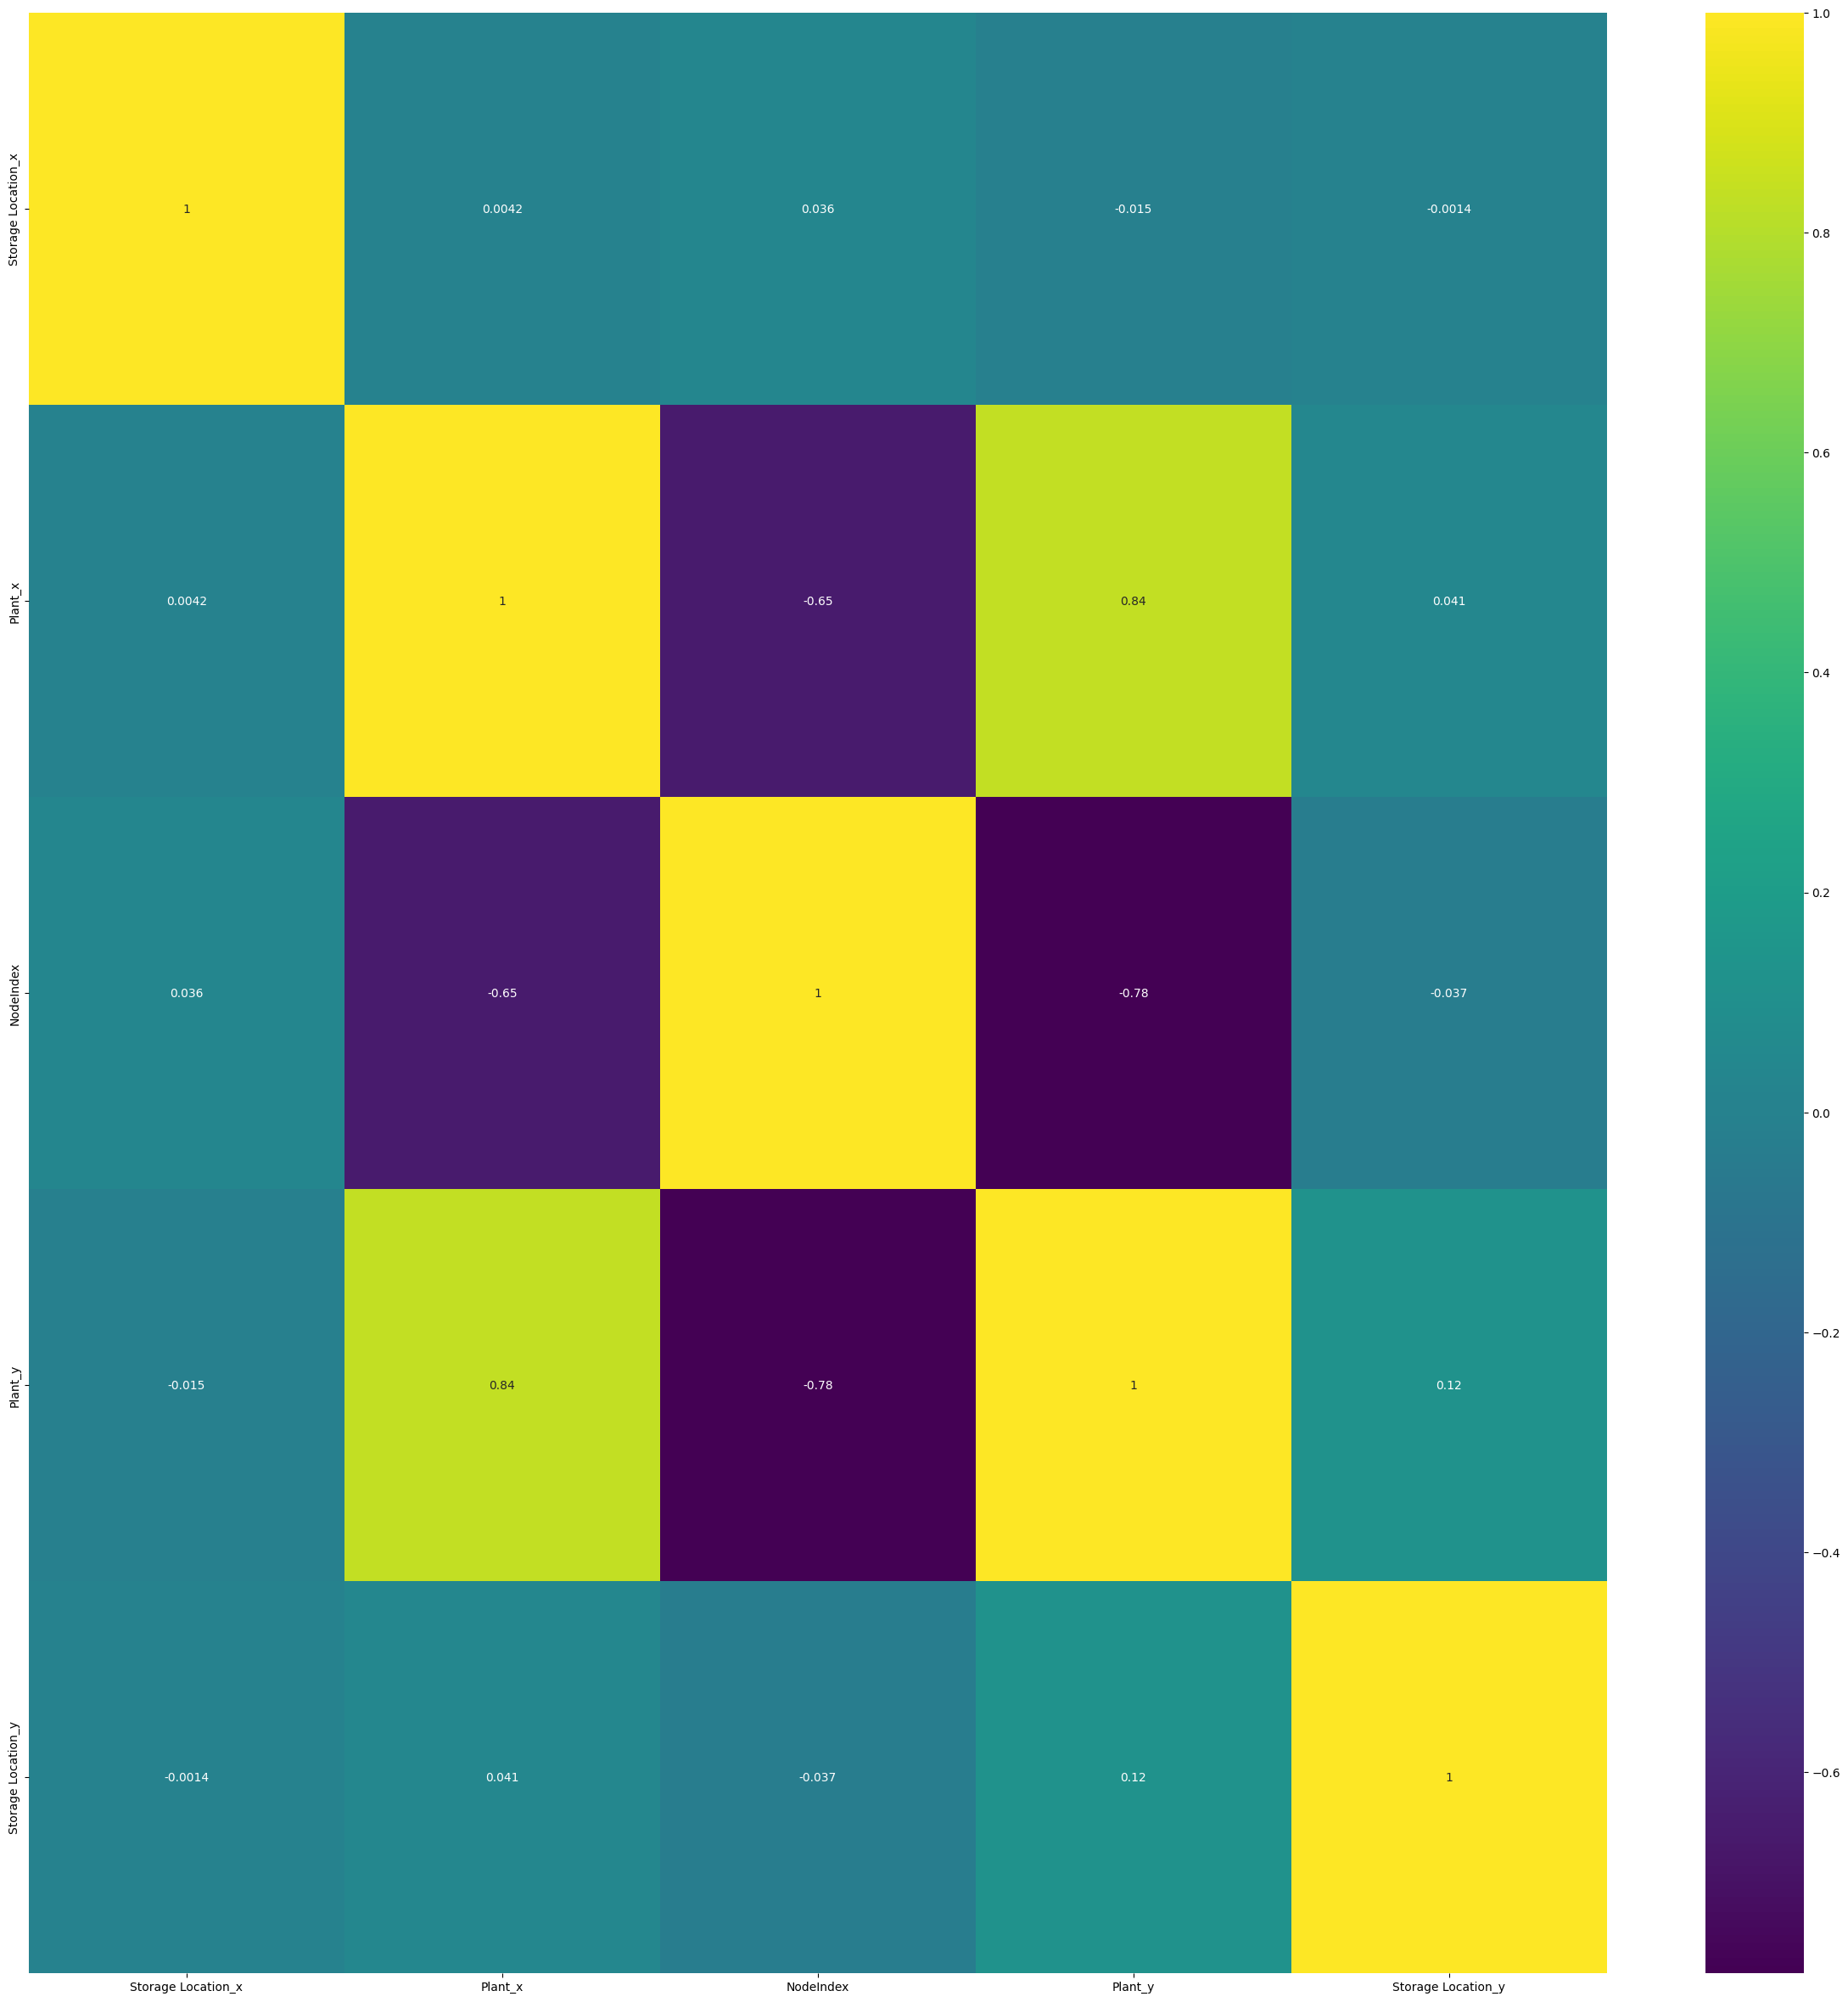

In [18]:
plt.figure(figsize=(30,30))

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, cmap='viridis', annot=True)

